In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv('houseprice.csv')
df.head()

,Sqr,Price($)
0,3447,895900
1,1767,247000
2,1232,44900
3,1417,959000
4,440,83500


In [9]:
df.dropna(inplace=True)

In [10]:
df

,Sqr,Price($)
0,3447,895900
1,1767,247000
2,1232,44900
3,1417,959000
4,440,83500
...,...,...
27567,1269,171000
27568,1720,409990
27569,733,300000
27570,1716,119000


In [11]:
scaler = StandardScaler()

In [12]:
df[['Sqr_T', 'Price($)_T']] = scaler.fit_transform(df[['Sqr', 'Price($)']])

In [13]:
df

,Sqr,Price($),Sqr_T,Price($)_T
0,3447,895900,-0.006653,0.341804
1,1767,247000,-0.013388,-0.276236
2,1232,44900,-0.015533,-0.468725
3,1417,959000,-0.014792,0.401903
4,440,83500,-0.018708,-0.431960
...,...,...,...,...
27567,1269,171000,-0.015385,-0.348622
27568,1720,409990,-0.013577,-0.120997
27569,733,300000,-0.017534,-0.225756
27570,1716,119000,-0.013593,-0.398149


In [20]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fit = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

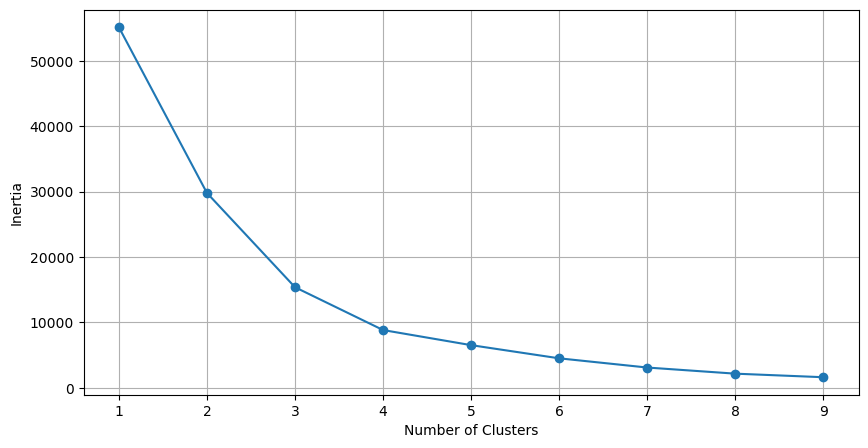

In [21]:
optimise_k_means(df[['Price($)_T', 'Sqr_T']], 10)

In [30]:
kmeans = KMeans(n_clusters=4)

In [31]:
kmeans.fit(df[['Sqr_T', 'Price($)_T']])

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [32]:
df['kmeans_4'] = kmeans.labels_

In [33]:
df

,Sqr,Price($),Sqr_T,Price($)_T,kmeans_4
0,3447,895900,-0.006653,0.341804,0
1,1767,247000,-0.013388,-0.276236,0
2,1232,44900,-0.015533,-0.468725,0
3,1417,959000,-0.014792,0.401903,0
4,440,83500,-0.018708,-0.431960,0
...,...,...,...,...,...
27567,1269,171000,-0.015385,-0.348622,0
27568,1720,409990,-0.013577,-0.120997,0
27569,733,300000,-0.017534,-0.225756,0
27570,1716,119000,-0.013593,-0.398149,0


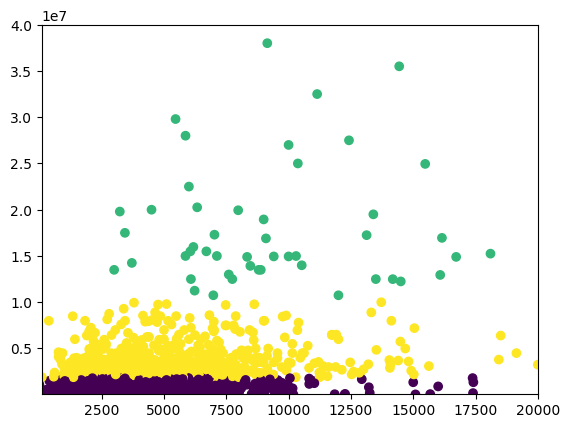

In [61]:
plt.scatter(x=df['Sqr'], y=df['Price($)'], c=df['kmeans_4'])
plt.xlim(100, 20000)
plt.ylim(50000, 40000000)
plt.show()

In [67]:
for k in range(1, 6):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(df[['Price($)', 'Sqr']])
        df[f'KMeans_{k}'] = kmeans.labels_

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

In [68]:
df

,Sqr,Price($),Sqr_T,Price($)_T,kmeans_4,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,3447,895900,-0.006653,0.341804,0,0,0,0,0,0
1,1767,247000,-0.013388,-0.276236,0,0,0,0,0,0
2,1232,44900,-0.015533,-0.468725,0,0,0,0,0,0
3,1417,959000,-0.014792,0.401903,0,0,0,0,0,0
4,440,83500,-0.018708,-0.431960,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27567,1269,171000,-0.015385,-0.348622,0,0,0,0,0,0
27568,1720,409990,-0.013577,-0.120997,0,0,0,0,0,0
27569,733,300000,-0.017534,-0.225756,0,0,0,0,0,0
27570,1716,119000,-0.013593,-0.398149,0,0,0,0,0,0


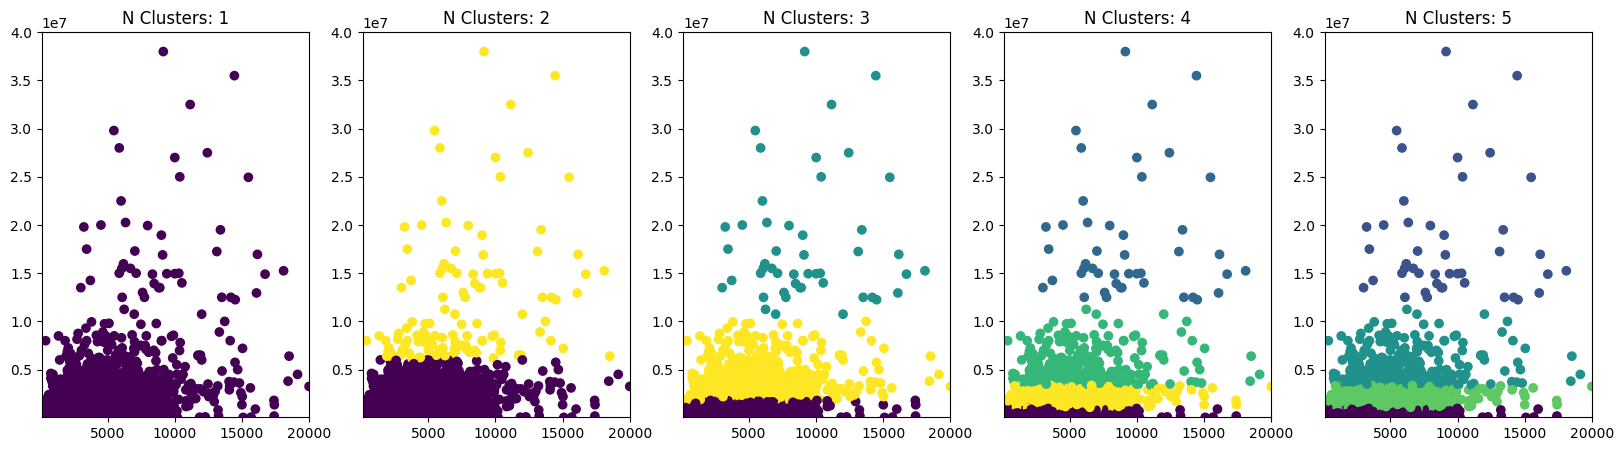

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['Sqr'], y=df['Price($)'], c=df[f'KMeans_{i}'])
    ax.set_ylim(50000, 40000000)
    ax.set_xlim(100, 20000)
    ax.set_title(f'N Clusters: {i}')